##Question 2: Perform


 Data Cleaning / Processing

 Exploratory Data Analysis

 Proper visualizations

 Any Insights (in comments)

Datasets: https://drive.google.com/file/d/1oQ2JY8OroTRGUBFbYxJqBxx7hGdo6MnS/view?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


#---------------------------------------------------------/\/

### **Data Cleaning / Processing**
### **Drop duplicates and missing values**
### **Fill missing values in 'Medal' with 'No Medal'.**

In [ ]:
data.drop_duplicates(inplace=True)
data.dropna(subset=['Age', 'Height', 'Weight'], inplace=True)
data['Medal'].fillna('No Medal', inplace=True)

In [ ]:
data.isnull().sum()

ID        0
Name      0
Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Games     0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

#-----------------------------------------------------------//

### **Exploratory Data Analysis**
### **Summary statistics**

In [ ]:
summary = data.describe()
summary

,ID,Age,Height,Weight,Year
count,206152.000000,206152.000000,206152.000000,206152.000000,206152.00000
mean,68615.742981,25.054736,175.372056,70.688332,1989.67849
std,38996.980304,5.481679,10.545816,14.340633,20.12571
min,1.000000,11.000000,127.000000,25.000000,1896.00000
25%,35189.000000,21.000000,168.000000,60.000000,1976.00000
50%,68629.000000,24.000000,175.000000,70.000000,1992.00000
75%,102312.250000,28.000000,183.000000,79.000000,2006.00000
max,135571.000000,71.000000,226.000000,214.000000,2016.00000




  1.   #### **Distribution of Age, Height, and Weight**










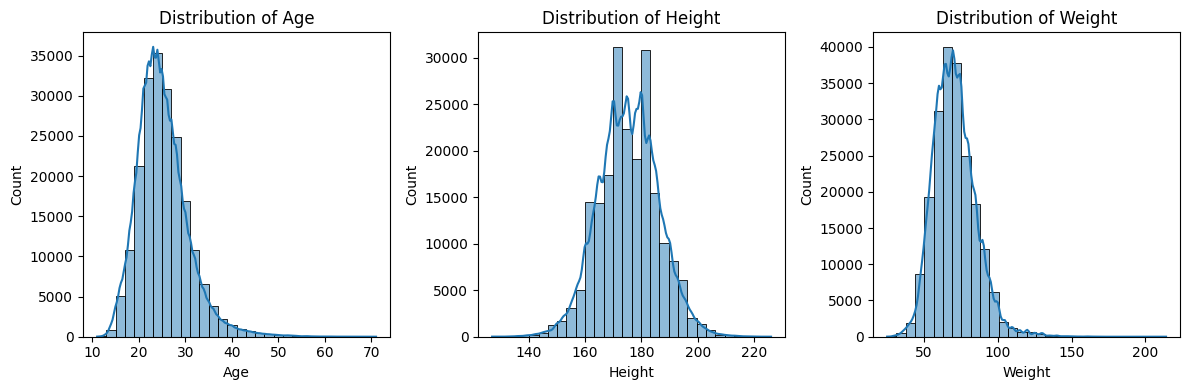

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(131)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

plt.subplot(132)
sns.histplot(data['Height'], bins=30, kde=True)
plt.title('Distribution of Height')

plt.subplot(133)
sns.histplot(data['Weight'], bins=30, kde=True)
plt.title('Distribution of Weight')

plt.tight_layout()
plt.show()


2.   #### **Top 20 Countries Winning Maximum Medals Over the Years**



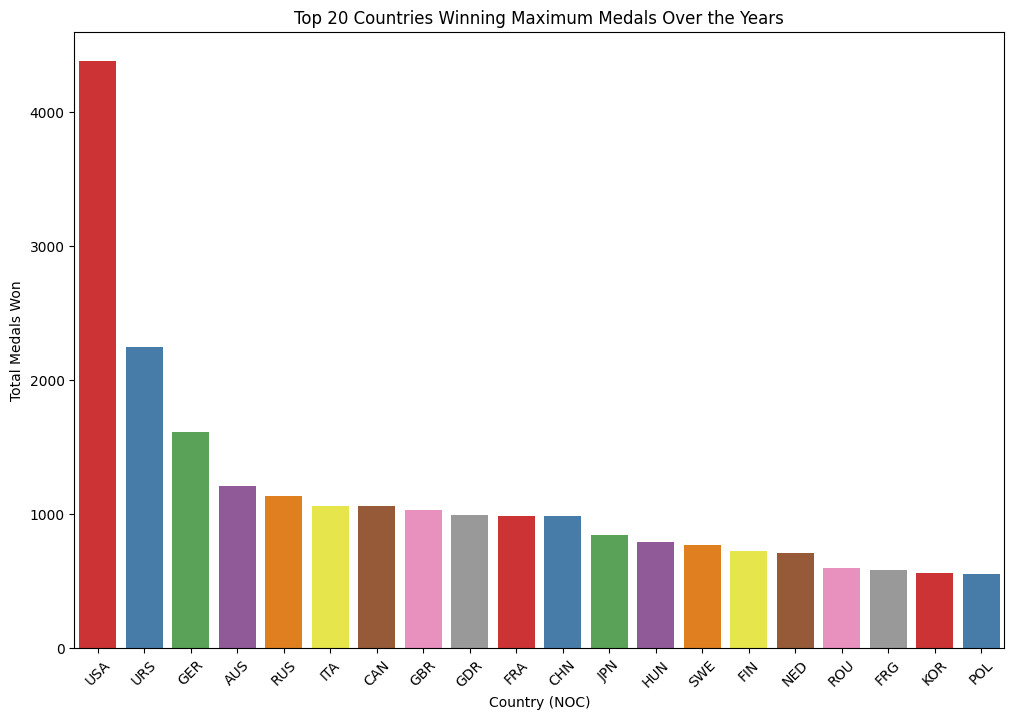

In [ ]:
top_countries = data[data['Medal'] != 'No Medal'].groupby('NOC')['Medal'].count().sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x=top_countries.index, y=top_countries.values, palette='Set1')
plt.xlabel('Country (NOC)')
plt.ylabel('Total Medals Won')
plt.title('Top 20 Countries Winning Maximum Medals Over the Years')
plt.xticks(rotation=45)
plt.show()





3.   #### **Female Participation Over The Years**




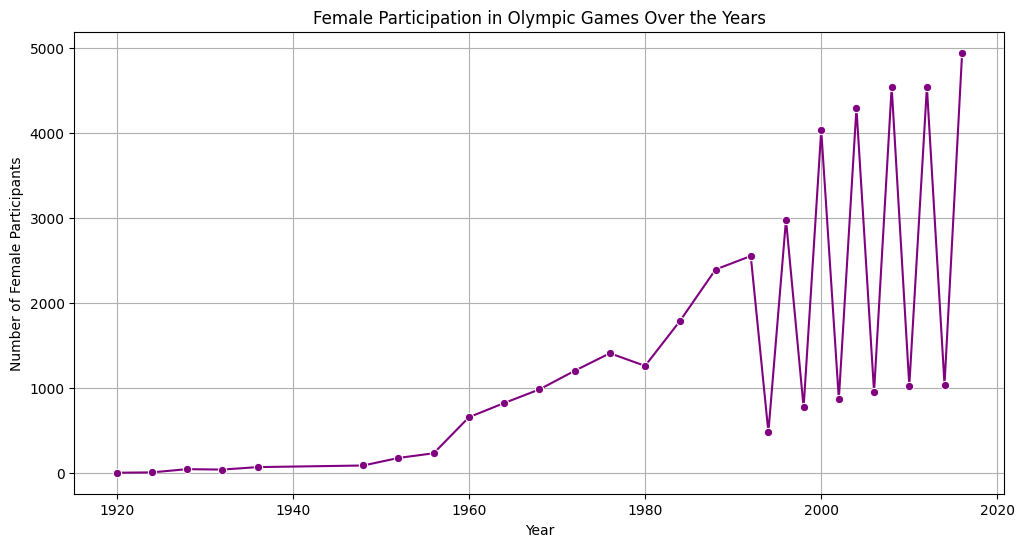

In [ ]:
# Female Participation Over The Years
female_participation = data[data['Sex'] == 'F'].groupby('Year')['ID'].nunique()
plt.figure(figsize=(12, 6))
sns.lineplot(data=female_participation, marker='o', color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Female Participants')
plt.title('Female Participation in Olympic Games Over the Years')
plt.grid(True)
plt.show()




4.   #### **Age Distribution by Gender**



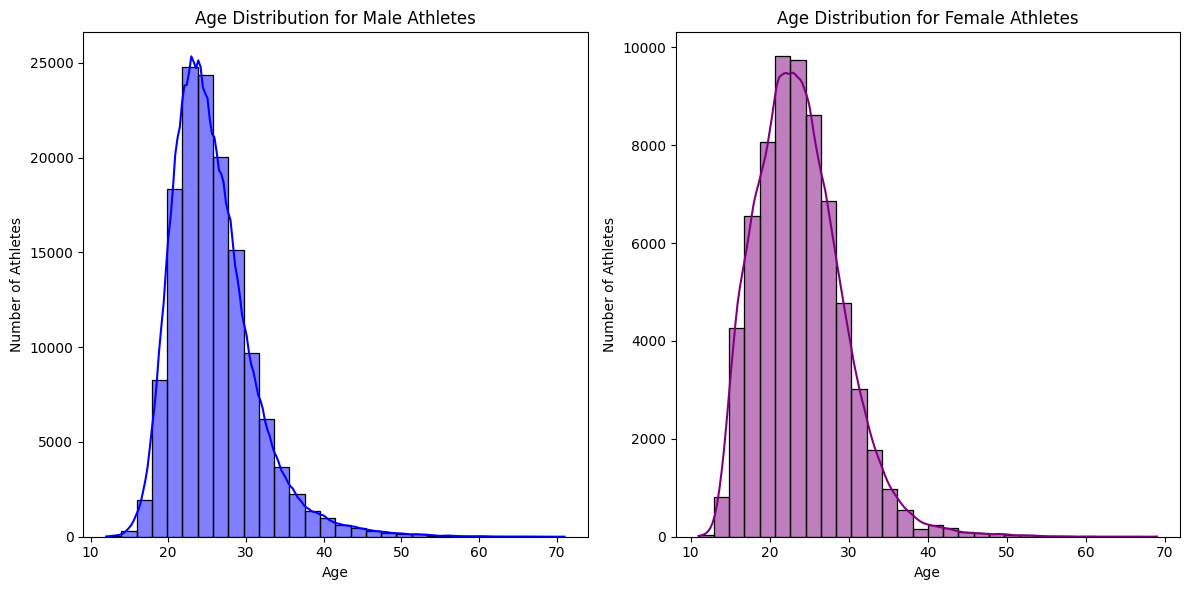

In [ ]:
male_data = data[data['Sex'] == 'M']
female_data = data[data['Sex'] == 'F']
plt.figure(figsize=(12, 6))

# Male Athletes
plt.subplot(1, 2, 1)
sns.histplot(male_data['Age'], bins=30, kde=True, color='blue')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.title('Age Distribution for Male Athletes')

# Female Athletes
plt.subplot(1, 2, 2)
sns.histplot(female_data['Age'], bins=30, kde=True, color='purple')
plt.xlabel('Age')
plt.ylabel('Number of Athletes')
plt.title('Age Distribution for Female Athletes')

plt.tight_layout()
plt.show()



5.   #### **Top 10 Individual winning maximum number of Olympics Medals for their country**




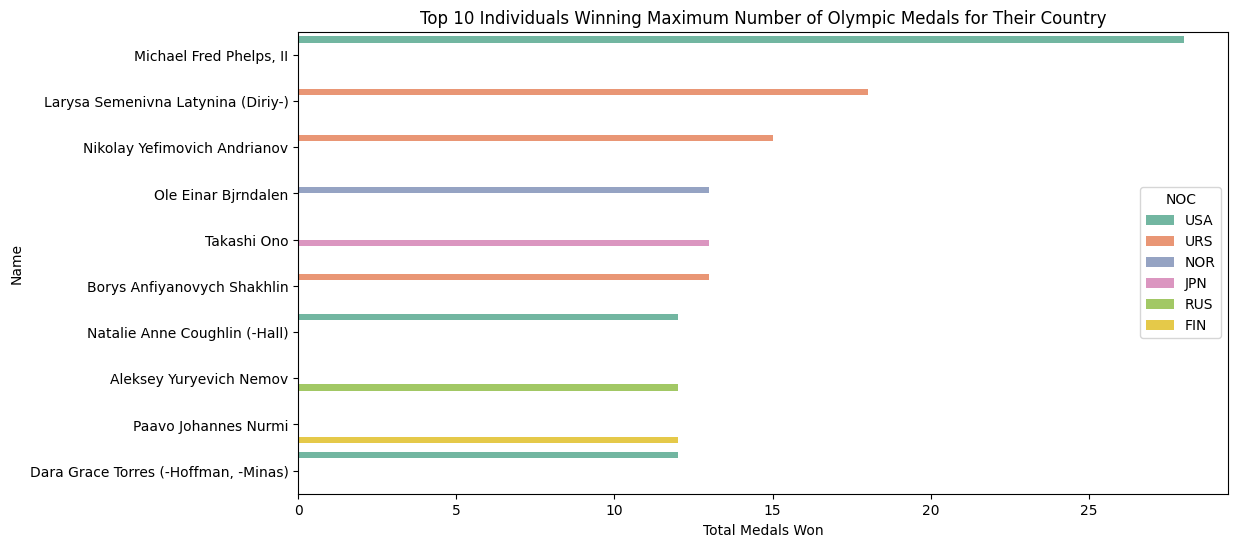

In [ ]:

top_individuals = data[data['Medal'] != 'No Medal'].groupby(['NOC', 'Name'])['Medal'].count().reset_index()
top_individuals = top_individuals.sort_values(by='Medal', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Medal', y='Name', hue='NOC', data=top_individuals, palette='Set2')
plt.xlabel('Total Medals Won')
plt.ylabel('Name')
plt.title('Top 10 Individuals Winning Maximum Number of Olympic Medals for Their Country')
plt.legend(title='NOC', loc='center right')
plt.xticks(rotation=0)
plt.show()



6.   #### **Top 15 Countries with the Most Gold Medals in 2016 Olympics**




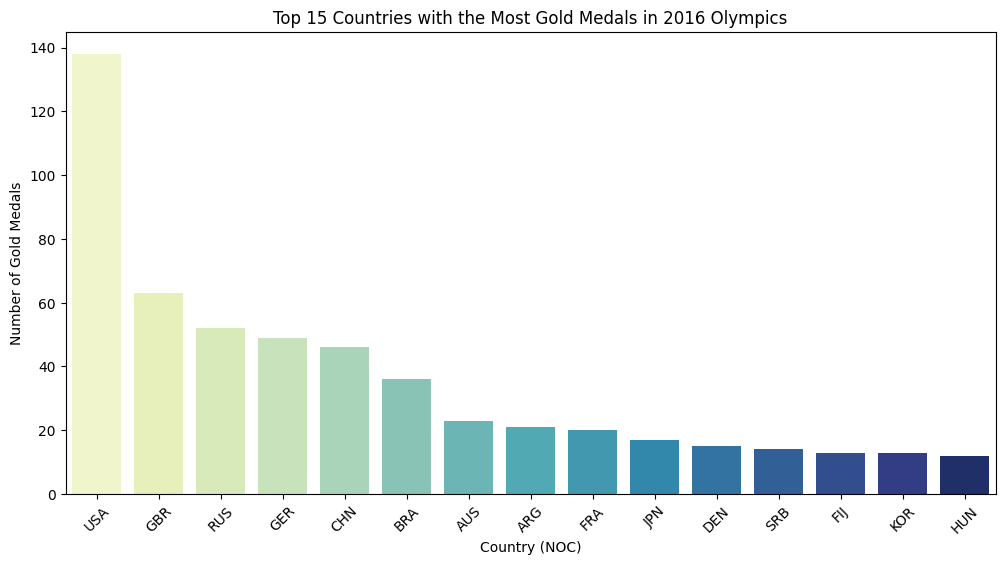

In [ ]:

gold_data = data[data['Medal'] == 'Gold']
last_year = data['Year'].max()

last_competition_gold = gold_data[gold_data['Year'] == last_year]
top_15_countries = last_competition_gold['NOC'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_15_countries.index, y=top_15_countries.values, palette='YlGnBu')
plt.xlabel('Country (NOC)')
plt.ylabel('Number of Gold Medals')
plt.title(f'Top 15 Countries with the Most Gold Medals in {last_year} Olympics')
plt.xticks(rotation=45)
plt.show()





7.   #### **The top 5 sports with the most medals**



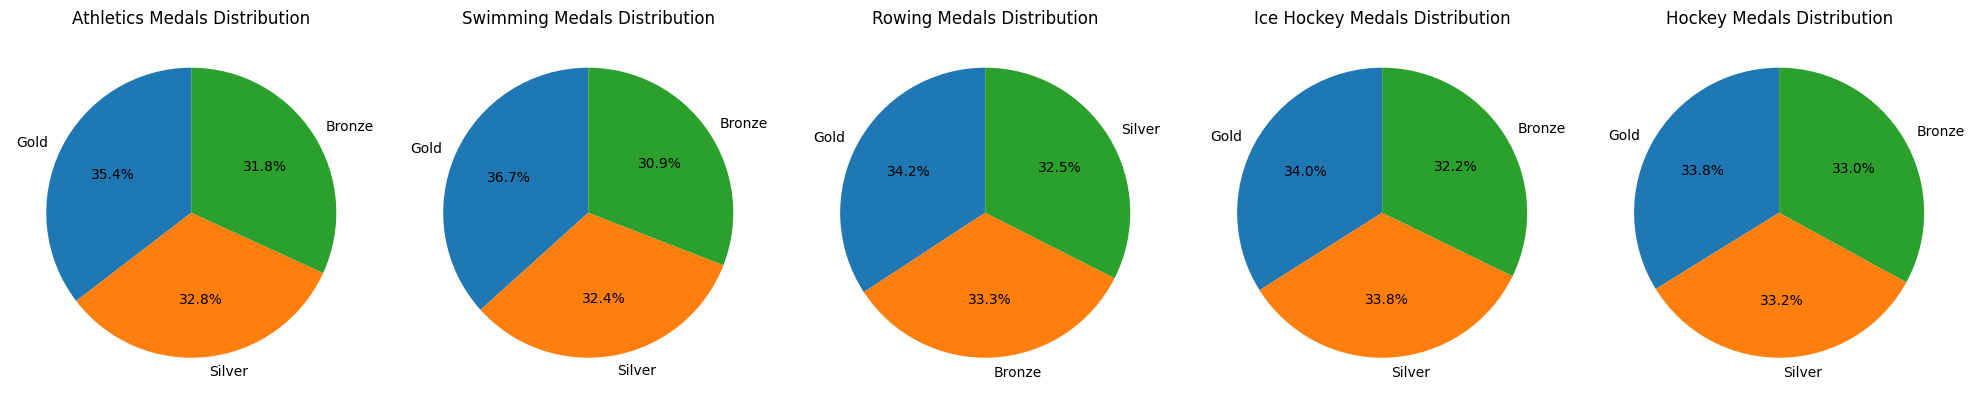

In [ ]:
medal_data = data[data['Medal'] != 'No Medal']

top_sports = medal_data['Sport'].value_counts().head(5).index.tolist()

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

for i, sport in enumerate(top_sports):
    ax = axes[i]
    sport_data = medal_data[medal_data['Sport'] == sport]
    medal_counts = sport_data['Medal'].value_counts()
    ax.pie(medal_counts, labels=medal_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{sport} Medals Distribution')

plt.tight_layout()
plt.show()




8.   ####  **Medal Distribution Over Time**






<Figure size 1200x600 with 0 Axes>

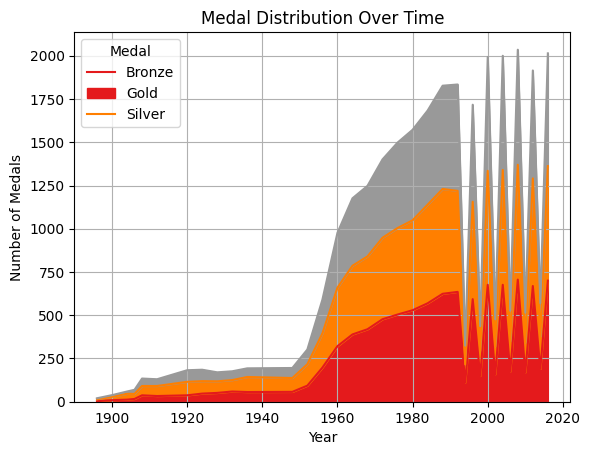

In [ ]:
medal_distribution_over_time = data[data['Medal'] != 'No Medal'].groupby(['Year', 'Medal'])['ID'].count().unstack()

plt.figure(figsize=(12, 6))
medal_distribution_over_time.plot(kind='area', stacked=True, colormap='Set1')
plt.xlabel('Year')
plt.ylabel('Number of Medals')
plt.title('Medal Distribution Over Time')
plt.legend(title='Medal', loc='upper left', labels=['Bronze', 'Gold', 'Silver'])
plt.grid(True)
plt.show()




9.   #### **Medal Distribution by Season**


<Figure size 800x600 with 0 Axes>

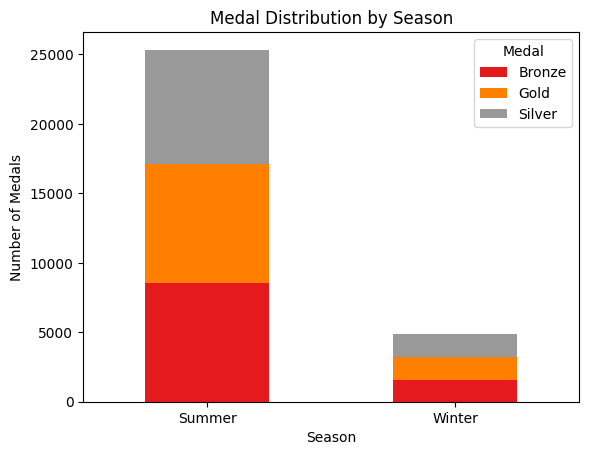

In [ ]:

medal_distribution_by_season = data[data['Medal'] != 'No Medal'].groupby(['Season', 'Medal'])['ID'].count().unstack()

plt.figure(figsize=(8, 6))
medal_distribution_by_season.plot(kind='bar', stacked=True, colormap='Set1')
plt.xlabel('Season')
plt.ylabel('Number of Medals')
plt.title('Medal Distribution by Season')
plt.legend(title='Medal', loc='upper right', labels=['Bronze', 'Gold', 'Silver'])
plt.xticks(rotation=0)
plt.show()




10.   #### **Team Size Over Time**




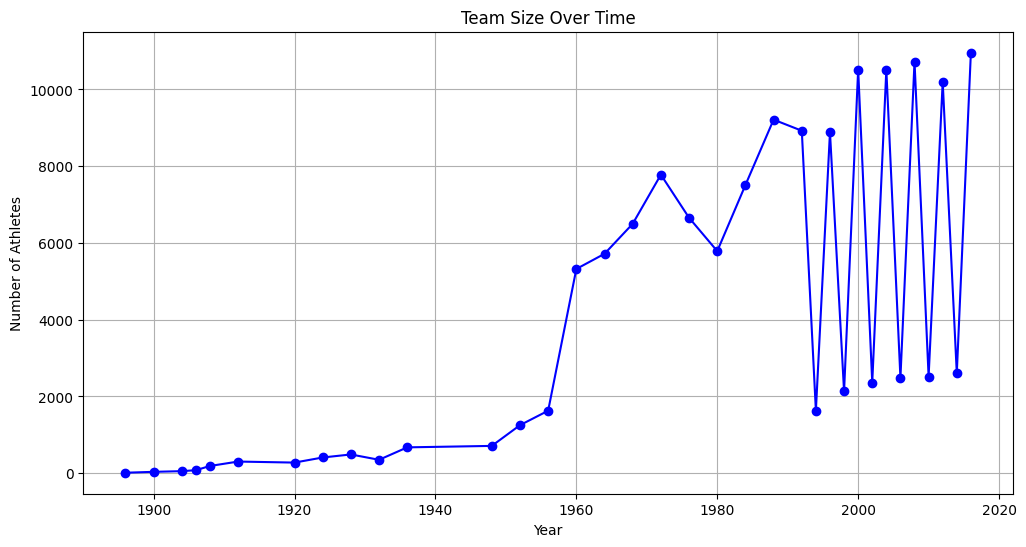

In [ ]:
team_size_over_time = data.groupby('Year')['ID'].nunique()

plt.figure(figsize=(12, 6))
team_size_over_time.plot(kind='line', marker='o', color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.title('Team Size Over Time')
plt.grid(True)
plt.show()


#--------------------------------------------------------------------//
#-------------------------------------------------------------------//


# ***INFERENCE***

## 1. Distribution of Age, Height, and Weight:
The age distribution appears to be roughly normal, with most athletes falling between the ages of 20 and 55.
The distribution of height and weight also seems normal, with some outliers indicating very tall or heavy athletes.

## 2. Top 20 Countries Winning Maximum Medals Over the Years:

The United States stands out because it not only has the highest number of gold medals but also the largest overall participation in the Olympic Games compared to other countries.
## 3. Female Participation Over the Years:

The number of female participants in the Olympics has shown an increasing trend over the years.
This signifies the growing inclusivity and representation of women in Olympic sports.
## 4. Age Distribution by Gender:

The age distribution of male and female athletes is generally similar, with the peak age range being 15 to 55.
Female athletes seems have more participants between age group 15-20 compared to Male.

## 5. Top 10 Individuals Winning Maximum Number of Olympics Medals for Their Country:

Michael Fred Phelps, II has won maximum medals for his country
##6. Top 15 Countries with the Most Gold Medals in 2016 Olympics:

In the 2016 Olympics, USA, Great Britain, Germany were in there peak
##7. The Top 5 Sports with the Most Medals:
Swimming, Rowing, Water polo, BasketBall and Athletes

##8. Medal Distribution Over Time:

The medal distribution over time shows fluctuations in the number of medals awarded in different years.
These trends may be influenced by factors such as changes in the number of events or the competitiveness of specific games as years passes by.
##9. Medal Distribution by Season:

The distribution of medals between Summer and Winter Olympics indicates that the Summer Olympics typically have a higher number of medal events.
This is due to the broader range of sports and events in the Summer Olympics.
##10. Team Size Over Time:

The team size (number of athletes per team) has generally increased over the years.
This trend could be attributed to the inclusion of more sports and events, as well as the growth of participating nations in the Olympics.




#***`These insights provide a comprehensive understanding of the dataset, revealing patterns and trends in Olympic data related to athletes, medals, and countries over the years.`***